<a href="https://colab.research.google.com/github/AureliaWambui19/Home-team-Away-team-scores-prediction/blob/main/wambui_aurelia_core_week_6_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Introduction
 * Football is a family of team sports that involve, to varying degrees, kicking a ball to score a goal.

 * The men's FIFA World Ranking is a ranking system for men's national teams in association football.    
 * Currently led by Belgium
 
 * A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches.
 
 

## 1.1 Defining the Question

*  I have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below :

* Predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (including rank of the respective team).

## 1.2 Metrics for Success
 
    * Obtaining about 80% Accuracy score and above
    * Correctly identifying status of results(win,loss,draw)
    
    

## 1.3 The Context

The new model for calculating the FIFA/Coca-Cola World Ranking (FWR) was developed over two years
during which time a large number of different algorithms was tested and extensively discussed.
Throughout this review and consultation process, the main aim was to identify an algorithm that is not
only intuitive, easy to understand and improves overall accuracy of the formula, but also addresses
feedback received about the previous model and provides fair and equal opportunities for all teams
across all confederations to ascend the FWR

The Elo method of calculation adds/subtracts points (as opposed to averaging points) for individual
matches to/from a team’s existing point total. The points which are added or subtracted are partially
determined by the relative strength of the two opponents, including the logical expectation that teams
higher in the ranking should fare better against teams lower in the ranking.




## 1.4 Experimental design taken

- Perform your EDA
- Perform any necessary feature engineering
- Check of multicollinearity
- Building a model
    * Approach 1: Polynomial regression model
    
        * Model 1: Predict how many goals the home team scores
        * Model 2: Predict how many goals the away team scores

    * Approach 2: Logistic regression model
    
         * Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)
    
- Cross-validate the model
- Compute RMSE
- Create residual plots for the model
- Assess Heteroscedasticity using Bartlett’s test


## 1.5 Appropriateness of the available Data

This project has  two datasets:

* Ranking dataset: contains the team ranks from 1993 to 2018

* Results dataset: contains matches and the team scores since 1892 to 2019

The link to the dataset is:

* https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc

 The data is relevant for this project


# 2 Data Understanding

In [11]:
# Importing Libraries we use for our analysis

import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler




# 2.1 Viewing our Datasets

In [12]:
# Reading the datasets
FifaRank = pd.read_csv('fifa_ranking.csv')
FifaResult = pd.read_csv('results.csv')

In [13]:
# Viewing the top 3 observation in the fifa ranking dataset
FifaRank.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [14]:
# Viewing the last 3 observation in the fifa ranking dataset
FifaRank.tail(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [15]:
# Viewing the last 3 observation in the result dataset
FifaResult.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


# 2.2 Checking data

In [16]:
# Checking the size of the fifa ranking dataset
FifaRank.shape

(57793, 16)

This  dataset has 57993 rows and 16 columns

In [17]:
# checking the size of the results dataset
FifaResult.shape

(40839, 9)

This dataset has 40839 rows and 9 columns

In [18]:
# Checking the ranking dataset information

FifaRank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [19]:
# Checking the result dataset information

FifaResult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [20]:
# Viewing the column names of the ranking dataset

FifaRank.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [21]:
# Viewing the column names of the result dataset

FifaResult.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

# 3 Feature Engineering

In [22]:
# finding the difference of scores and storing them in a new column called game_result
FifaResult['game_results'] = FifaResult['home_score'] -FifaResult['away_score']
FifaResult.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_results
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0


In [23]:
# Creating a function to specify whether its a win , loss or a draw based on a home team perspective
# the results (its a win , loss or a draw ) are stored in a new column called status
      
def home_team(game_results):
    if game_results > 0:
        return 'win'
    elif game_results < 0:
        return 'loss'
    else:
        return 'draw'
      
FifaResult['status'] = FifaResult.game_results.apply(lambda w: home_team(w))





In [24]:
FifaResult.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_results,status
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win


In [25]:
# finding unique values in tournament column 

FifaResult.tournament.unique()


array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

In [26]:
# Changing the tournament type into three categories 
# Tournament type (World cup, Friendly, Other)   
# The 3 respective category will be stored in a new column named tournament_type
def ton(tournament_type):
    if tournament_type == 'Friendly':
        return 'Friendly'
    elif tournament_type == 'FIFA World Cup':
        return 'World cup'
    else:
        return 'Other'
  
FifaResult['tournament_type'] = FifaResult.tournament.apply(lambda t: ton(t))


In [27]:
FifaResult.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_results,status,tournament_type
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,Friendly


In [28]:
# Changing the dates column in both datasets into datetime format

FifaResult['date'] = pd.to_datetime(FifaResult['date'])
FifaRank['rank_date'] = pd.to_datetime(FifaRank['rank_date'])

In [29]:
# Confirming that we have changed the date columns into datetime datatypes

print(FifaRank.rank_date.dtypes)
print(' ')
print(FifaResult.date.dtypes)

datetime64[ns]
 
datetime64[ns]


In [30]:
# Extracting the year and month from the date column; 
# Here we will create a new column for each
FifaResult['year'] = pd.DatetimeIndex(FifaResult['date']).year
FifaResult['month'] = pd.DatetimeIndex(FifaResult['date']).month

FifaRank['year'] = FifaRank['rank_date'].dt.year
FifaRank['month'] =FifaRank['rank_date'].dt.month

In [31]:
# confirming the changes
FifaResult.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_results,status,tournament_type,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,Friendly,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,Friendly,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,Friendly,1874,3


In [33]:
# confirming changes

FifaRank.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8


In [34]:
# changing the full country column name in ranking dataset to home_team so as to ease manipulation of the datasets when merging them later

FifaRank= FifaRank.rename({'country_full': 'home_team'}, axis = 1)

In [35]:
# confirming changes

FifaRank.head(2)

,rank,home_team,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8


In [37]:
# Dropping unnecessary columns in result dataset

FifaResult.drop(['date', 'game_results'], axis = 1, inplace = True)

In [38]:
FifaResult.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'status', 'tournament_type', 'year',
       'month'],
      dtype='object')

In [39]:

 # Dropping unnecessary columns in rank dataset

FifaRank.drop(['country_abrv','rank_date', 'total_points', 'previous_points','cur_year_avg', 'cur_year_avg_weighted' ,'last_year_avg' , 'last_year_avg_weighted' , 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg' ,'three_year_ago_weighted', 'confederation'], axis =1, inplace = True)

In [40]:
# Merging datasets

# Based on home_team, year, month

home_me= pd.merge(FifaResult,FifaRank, how="left", on = ['home_team', 'year', 'month'])


In [41]:
# viewing our merged dataset 4 top observations
home_me.head(4)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,status,tournament_type,year,month,rank,rank_change
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,Friendly,1872,11,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,Friendly,1873,3,NaN,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,Friendly,1874,3,NaN,NaN
3,England,Scotland,2,2,Friendly,London,England,False,draw,Friendly,1875,3,NaN,NaN


In [42]:
# viewing our merged dataset lastb 3 observations
home_me.tail(3)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,status,tournament_type,year,month,rank,rank_change
40905,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,loss,Other,2019,7,NaN,NaN
40906,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,loss,Other,2019,7,NaN,NaN
40907,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True,draw,Other,2019,7,NaN,NaN


In [43]:
# renaming the rank column name to home_rank so as to get the respective  rank of the home team

home_me = home_me.rename({'rank': 'home_rank'}, axis = 1)

In [44]:
# Confirming changes

home_me.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,status,tournament_type,year,month,home_rank,rank_change
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,Friendly,1872,11,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,Friendly,1873,3,NaN,NaN


In [45]:

#  renaming the column home_team (originally called country full) as away team  so that we get their individual ranks of away teams
FRankone= FifaRank.rename({'home_team': 'away_team'}, axis = 1)
FRankone.head(2)

,rank,away_team,rank_change,year,month
0,1,Germany,0,1993,8
1,2,Italy,0,1993,8


In [46]:
# Merging the home_merged dataset with the 
# Based on away_team, year, month
Fiifa = pd.merge(home_me,FRankone, how="left", on = ['away_team', 'year', 'month'])

In [47]:
# Checking the first two observations of the merged dataset

Fiifa.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,status,tournament_type,year,month,home_rank,rank_change_x,rank,rank_change_y
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,Friendly,1872,11,NaN,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,Friendly,1873,3,NaN,NaN,NaN,NaN


In [48]:
# renaming the rank column as away rank in the new dataframe

Fiifa = Fiifa.rename({'rank': 'away_rank'}, axis = 1)
Fiifa.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,status,tournament_type,year,month,home_rank,rank_change_x,away_rank,rank_change_y
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,Friendly,1872,11,NaN,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,Friendly,1873,3,NaN,NaN,NaN,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,Friendly,1874,3,NaN,NaN,NaN,NaN
3,England,Scotland,2,2,Friendly,London,England,False,draw,Friendly,1875,3,NaN,NaN,NaN,NaN
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,Friendly,1876,3,NaN,NaN,NaN,NaN


# 4 Tyding the dataset

In [49]:
# checking for unique year rankings
FifaRank.year.unique()


array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

Rankings are from 1993 t0 2018 .after merging a lot of missing values were noted especialy in years before 1993 and after 2018.therefore i will drop the data where this was observed as there are no rankings available

In [50]:
Fiifa.dropna(inplace = True)

In [51]:
# confirming that there are no null values

Fiifa.isnull().sum()

home_team          0
away_team          0
home_score         0
away_score         0
tournament         0
city               0
country            0
neutral            0
status             0
tournament_type    0
year               0
month              0
home_rank          0
rank_change_x      0
away_rank          0
rank_change_y      0
dtype: int64

In [52]:
# checking for duplicates

Fiifa.duplicated().sum()

68

In [53]:
# dropping the duplicates
Fiifa.drop_duplicates(inplace = True)


In [54]:
# Checking that we have no duplicates in the data
Fiifa.duplicated().sum()

0

In [55]:
# checking columns of merged dataset

Fiifa.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'status', 'tournament_type', 'year',
       'month', 'home_rank', 'rank_change_x', 'away_rank', 'rank_change_y'],
      dtype='object')

In [56]:
# viewing our dataset after cleaning
Fiifa.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,status,tournament_type,year,month,home_rank,rank_change_x,away_rank,rank_change_y
17910,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,draw,Other,1993,8,19.0,16.0,67.0,1.0
17911,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,loss,Other,1993,8,70.0,8.0,5.0,5.0
17912,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,draw,Other,1993,8,22.0,-6.0,35.0,30.0
17913,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,loss,Other,1993,8,94.0,31.0,8.0,-5.0
17914,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,draw,Other,1993,8,58.0,-7.0,25.0,7.0


In [57]:
#  checking the shape of the cleaned data

Fiifa.shape

(16889, 16)

This dataset has 16889 rows and 16 columns

In [58]:
# Encoding the categorical columns so as to manage perform operations such as correlation check
#

le = LabelEncoder()
Fiifa= Fiifa.apply(le.fit_transform)


In [59]:
# Confirming the changes

Fiifa.head(5)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,status,tournament_type,year,month,home_rank,rank_change_x,away_rank,rank_change_y
17910,41,137,0,0,26,119,42,0,0,1,0,7,18,55,66,45
17911,138,8,0,1,26,636,148,0,1,1,0,7,69,47,4,49
17912,184,55,0,0,26,763,201,0,0,1,0,7,21,33,34,74
17913,187,27,1,5,26,1044,204,0,1,1,0,7,93,70,7,39
17914,152,191,0,0,26,6,95,1,0,1,0,7,57,32,24,51


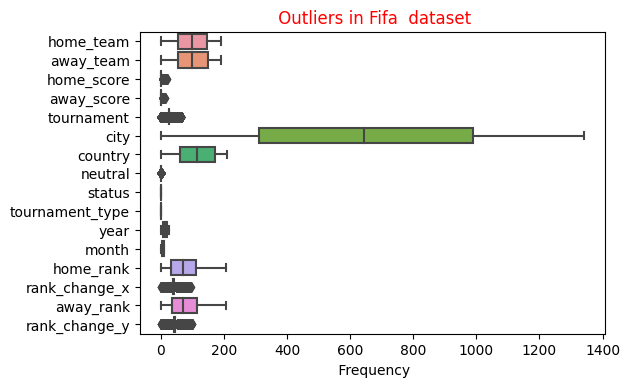

In [60]:
# checking for outliers in our dataset
# Using boxplots
# Labeling the title of our chart
# Displaying chart 

plt.figure(dpi = 100)
ax = sns.boxplot(data = Fiifa,orient='h')
plt.title(' Outliers in Fifa  dataset', color = 'red')
plt.xlabel(' Frequency')
plt.show()

# 5 Exploratory data analysis

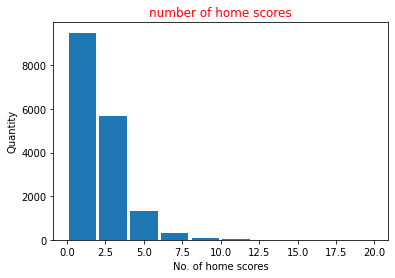

In [61]:
h=Fiifa['home_score']

plt.hist(h, histtype='bar', rwidth=0.9)
plt.xlabel('No. of home scores')
plt.ylabel('Quantity')
plt.title('number of home scores',color='red')
plt.show()

 home teams scored mostly one goal

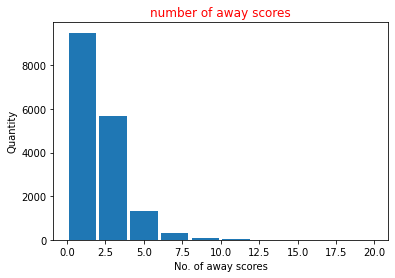

In [62]:
a=Fiifa['away_score']

plt.hist(h, histtype='bar', rwidth=0.9)
plt.xlabel('No. of away scores')
plt.ylabel('Quantity')
plt.title('number of away scores',color='red')
plt.show()

Most away teams score atleast one goal

Both histograms are  positively skewed .This shape indicates that there are a number of data points, perhaps outliers, that are greater than the mode


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


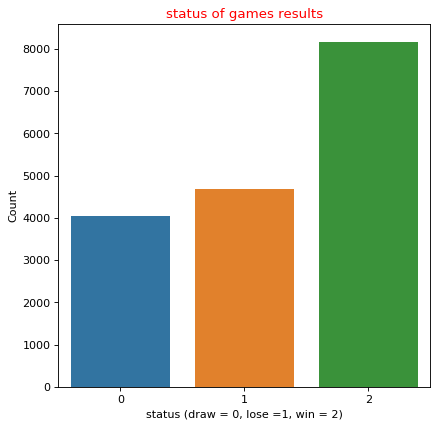

In [63]:
# status of game results in respect tothe home team(draw = 0, lose =1, win = 2)
# Using a countplot to visualize these results
# Using Seaborn
# Labeling the x and y axis
# Giving a title to our chart
# Displaying our chart

plt.figure(figsize = (6,6), dpi = 80)
sns.countplot(Fiifa['status'])
plt.xlabel('status (draw = 0, lose =1, win = 2)')
plt.ylabel('Count')
plt.title('status of games results', color = 'red')
plt.show()

The  above bar chart above shows that wins by the home teams are high as compared to loss/draws

# 6 Multicollinearity
 * Checking for multicollinearity
 * Solving multicollinearity

In [64]:
# Before we build a model we shall check if
# the independent variables are collinear/ correlated to each other
# Getting the pearson correation coefficient for each of the variables

correlation = Fiifa.corr()
correlation

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,status,tournament_type,year,month,home_rank,rank_change_x,away_rank,rank_change_y
home_team,1.000000,0.009999,0.017875,-0.033232,-0.046225,-0.084928,0.742702,-0.049546,0.011477,0.003347,0.002747,0.040741,-0.003722,-0.002395,0.062434,-0.003252
away_team,0.009999,1.000000,-0.042943,0.015813,-0.036354,-0.030358,-0.007139,0.039845,-0.019170,-0.006096,-0.008390,0.023472,0.049373,-0.001672,-0.009888,-0.002201
home_score,0.017875,-0.042943,1.000000,-0.164602,-0.014566,-0.012400,-0.004165,-0.041733,0.522522,0.050249,-0.038570,0.019200,-0.136220,0.085945,0.320022,-0.077205
away_score,-0.033232,0.015813,-0.164602,1.000000,0.029747,0.011690,-0.005059,0.100376,-0.241997,0.034529,-0.008420,0.018266,0.221594,-0.090063,-0.180567,0.102108
tournament,-0.046225,-0.036354,-0.014566,0.029747,1.000000,0.074452,-0.055594,-0.079903,-0.005100,-0.010735,-0.058891,0.088975,-0.146436,-0.061078,-0.157283,-0.023410
city,-0.084928,-0.030358,-0.012400,0.011690,0.074452,1.000000,-0.102360,-0.036555,0.011379,0.000968,0.025388,-0.002007,-0.016565,-0.009979,-0.037492,-0.011533
country,0.742702,-0.007139,-0.004165,-0.005059,-0.055594,-0.102360,1.000000,0.140573,-0.005324,-0.016837,-0.013207,0.024035,-0.017555,-0.014764,0.037898,-0.005525
neutral,-0.049546,0.039845,-0.041733,0.100376,-0.079903,-0.036555,0.140573,1.000000,-0.044874,0.126734,0.042749,-0.104652,0.037470,0.019587,0.048054,0.052520
status,0.011477,-0.019170,0.522522,-0.241997,-0.005100,0.011379,-0.005324,-0.044874,1.000000,0.045366,-0.018781,0.011373,-0.115631,0.102251,0.213884,-0.087113
tournament_type,0.003347,-0.006096,0.050249,0.034529,-0.010735,0.000968,-0.016837,0.126734,0.045366,1.000000,-0.020018,0.122501,0.068634,0.091498,0.068785,0.090050


The correlation matrix indicates that most variables are moderately or weakly correlated.*(both positively and negatively)

This is very beneficial when creating a model, as collinear variables reduce the power of the model to identify independent 
variables that are statistically significant. 

We will use the correlation matrix to calculate the vif (Variance Inflation Factor).
Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.


In [65]:
# checking for multicollinearity
# Using the variance Inflation Factor (VIF)
# 
# This is calculated using linear algebra inverse function

pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns)

# From the correlation matrix below there are no correlated independent variables as all have VIF below 5, which is the threshold

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,status,tournament_type,year,month,home_rank,rank_change_x,away_rank,rank_change_y
home_team,2.380019,-0.054073,-0.003485,0.013910,0.019658,0.024658,-1.818218,0.394409,0.009617,-0.081914,-0.043613,0.000140,0.020260,-0.017174,-0.092450,-0.020939
away_team,-0.054073,1.010738,0.029113,0.010158,0.033186,0.028172,0.058604,-0.054657,-0.011258,0.017981,0.017312,-0.033946,-0.064013,0.003710,0.042995,0.010030
home_score,-0.003485,0.029113,1.598481,-0.118212,0.001222,0.017757,0.029563,0.056150,-0.669478,-0.039776,0.063596,-0.004601,0.438909,-0.047179,-0.598982,0.052249
away_score,0.013910,0.010158,-0.118212,1.242799,-0.039814,-0.011516,-0.012775,-0.124001,0.194511,-0.024936,0.014762,-0.031848,-0.470786,0.089707,0.436146,-0.082852
tournament,0.019658,0.033186,0.001222,-0.039814,1.061838,-0.065324,0.031687,0.058022,-0.011801,-0.002518,0.045017,-0.098139,0.109513,0.062285,0.099147,0.022577
city,0.024658,0.028172,0.017757,-0.011516,-0.065324,1.019144,0.077702,0.023079,-0.027539,-0.006740,-0.031298,0.006765,0.000035,0.004287,0.024274,0.008439
country,-1.818218,0.058604,0.029563,-0.012775,0.031687,0.077702,2.428923,-0.451141,-0.004716,0.102085,0.058170,-0.051127,0.046124,0.034661,0.006498,0.027839
neutral,0.394409,-0.054657,0.056150,-0.124001,0.058022,0.023079,-0.451141,1.148833,0.022180,-0.162179,-0.054265,0.134600,0.069521,-0.029516,-0.117479,-0.035278
status,0.009617,-0.011258,-0.669478,0.194511,-0.011801,-0.027539,-0.004716,0.022180,1.438676,-0.039149,0.002531,0.003875,0.071644,-0.067822,-0.090098,0.053049
tournament_type,-0.081914,0.017981,-0.039776,-0.024936,-0.002518,-0.006740,0.102085,-0.162179,-0.039149,1.064645,0.024599,-0.139668,-0.057572,-0.077576,-0.017462,-0.083516


We check VIFs along the diagonal.

VIFs Values greater than 5 indicate that the presence of multicollinearity.

If present we remove the variable with the greatest VIF value.

Typically, a VIF value around 5 is a potential problem, and value around 10 is considered seriously problematic and suggests that the related variable should be dropped from the model.

From the correlation matrix there are no correlated independent variables as all have VIF values are below 5, which is the threshold and therefore no variable will be dropped in this project

# 8 Building a Model

## 8.1 Polynomial Regression Model

In [ ]:
# Approach 1: Polynomial approach

# What to train given:

# Rank of home team
# Rank of away team
# Tournament type

# Model 1: Predict how many goals the home team scores

# Model 2: Predict how many goals the away team scores

### Model 1

Predict how many goals the home team scores

In [66]:
# Viewing our dataset before splitting 

Fiifa.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,status,tournament_type,year,month,home_rank,rank_change_x,away_rank,rank_change_y
17910,41,137,0,0,26,119,42,0,0,1,0,7,18,55,66,45
17911,138,8,0,1,26,636,148,0,1,1,0,7,69,47,4,49


In [67]:
# Model 1
# Predict how many goals the home team scores given home rank

X = Fiifa['home_rank'].values.reshape(-1, 1)
y = Fiifa['home_score'].values.reshape(-1, 1)




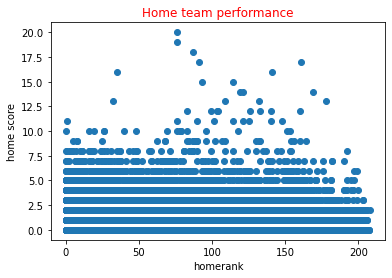

In [68]:
# showing relationship between home rank and home score

plt.scatter(X,y) 
plt.title('Home team performance', color = 'red')
plt.xlabel('homerank')
plt.ylabel('home score')
plt.show()


There are more points on the lower side of the scatter plot.
  home team scores are mostly  between 0 and 5 goals.

In [69]:
X.shape

(16889, 1)

In [70]:
y.shape

(16889, 1)

In [71]:
# Split the dataset into train and test sets
# this means training data is 80% while test size is 20%

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=2)


In [120]:
# Fitting the polynomial features to the X the independent variable


poly_reg = PolynomialFeatures(degree =4)
X_poly = poly_reg.fit_transform(X)


In [121]:
# Fitting a polynomial Regression to the dataset.

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

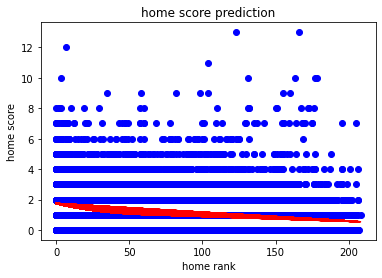

In [122]:
# Visualizing the polynomial Regression results

plt.scatter(X, y, color='blue') 
plt.plot(X, pol_reg.predict(X_poly),color='red')
plt.title('home score prediction')
plt.xlabel('home rank')
plt.ylabel('home score')
plt.show()



Using the polynomial regression model of degree 4,

most data points have  been  omitted
the visualization as appears  makes it difficult to analyze and makes use of this model difficult to use for predictions

In [123]:
# Making predictions using our model

poly_pred = pol_reg.predict(poly_reg.fit_transform([[20]]))
print('Polynomial prediction when home rank is 20 the home team score is: %d' %poly_pred)

Polynomial prediction when home rank is 20 the home team score is: 1


### Model 2 

Predict how many goals the away team scores



In [113]:
# Model 2: Predict how many goals the away team scores given the away team rank

#
X = Fiifa['away_rank'].values.reshape(-1, 1)

y = Fiifa['away_score'].values.reshape(-1, 1)



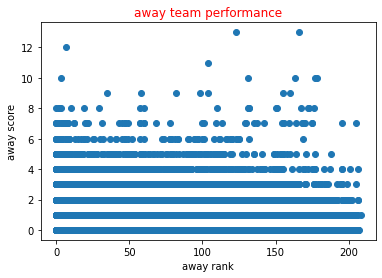

In [114]:
# Visualizing the dependent vs independent variable using a scatter plot

plt.scatter(X,y) 
plt.title('away team performance', color = 'red')
plt.xlabel('away rank')
plt.ylabel('away score')
plt.show()



most cases the away team scores between 0 and 4 goals.

In [115]:
## Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [116]:
# Fitting the polynomial features to the X

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

In [117]:
# Fitting a polynomial Regression to the dataset

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

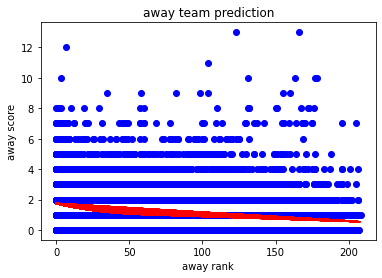

In [118]:
 # Visualizing the polynomial Regression results using a scatter plot

plt.scatter(X, y, color='blue') 
plt.plot(X, pol_reg.predict(X_poly),color='red')
plt.title('away team prediction')
plt.xlabel('away rank')
plt.ylabel('away score')
plt.show()


Using the polynomial regression model of degree 4,
most data points have not been highlighted
This is underfitting.
The polynomial regression is not a good model to predict how many goals the away team scores given the away team rank.

In [111]:
# Making predictions using our model

poly_pred = pol_reg.predict(poly_reg.fit_transform([[58]]))
print('Polynomial prediction when home away rank is 58 the away team score is: %d' %poly_pred)

Polynomial prediction when home away rank is 58 the away team score is: 1


## 8.2 Logistic Regression Model

- Logistic regression is a predictive analysis. 

- Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.
- Logistic Regression is used when the dependent variable(target) is categorical.
- In this model, we will be predicting whether the home team (Wins, Losses or Draws) in a match.


In [90]:
# Viewing the first two observations before splittig our dataset

Fiifa.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,status,tournament_type,year,month,home_rank,rank_change_x,away_rank,rank_change_y
17910,41,137,0,0,26,119,42,0,0,1,0,7,18,55,66,45
17911,138,8,0,1,26,636,148,0,1,1,0,7,69,47,4,49


In [91]:
# Splitting our dataset
# X: independent variables
# y: dependent variable

# Splitting the data into train and test sets

X = Fiifa.drop(['status'], axis = 1)
y = Fiifa.status


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [92]:
# Fitting our model to our train sets
# Logistic Regression model in this case
# 

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
# Using our model to make a prediction

y_pred = LogReg.predict(X_test)

In [94]:
# Evalauting the model


print(accuracy_score(y_test, y_pred))

0.6272942569567792


The model has  an accuracy  score of 62.72%

# 9 Cross-Validation 

In [95]:
# Using KFolds

# Splitting our dataset
# independet variables as X
# dependent variable as y

X = Fiifa.drop(['status'], axis = 1).values
y = Fiifa.status.values

# specifying the number of folds
folds = KFold(n_splits = 10)


# We now create and assess 10 models based on the folds we created.

RMSES = [] # An array of RMSEs to keep track of the RSME of each model
count = 1   # starting point # helps to keep track of the model number in training
for train_index, test_index in folds.split(X):

  
  # Setting up the train and test based on the split determined by KFold
  # With 10 folds we split our data into training and test sets
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fitting a Logistic regression model
  LogReg = LogisticRegression()  
  LogReg.fit(X_train, y_train)
  
  # Assess the accuracy of the model
  y_pred = LogReg.predict(X_test)
  
  # Calculating the RMSES of each model
  # Appending each RMSE into the list earlier created
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  
  # printing each model RMSE
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1
  
 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model 1 Root Mean Squared Error: 0.8712227104760641


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model 2 Root Mean Squared Error: 0.9239911369042241


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model 3 Root Mean Squared Error: 0.8983242078864608


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model 4 Root Mean Squared Error: 0.904890992718667


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model 5 Root Mean Squared Error: 0.8705428643245582


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model 6 Root Mean Squared Error: 0.8833704763351714


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model 7 Root Mean Squared Error: 0.8877163175864107


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model 8 Root Mean Squared Error: 0.9420761120147845


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model 9 Root Mean Squared Error: 0.9220668214446279
Model 10 Root Mean Squared Error: 0.927144625394606


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [96]:
# Printing the mean  of the RMSES in all the 10 models

print(np.mean(RMSES))

 

0.9031346265085574


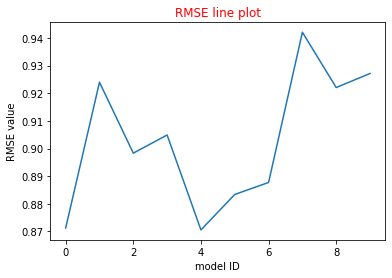

In [98]:
 # Visualizing the 10-folds RMSES using a scatter plot



plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.title("RMSE line plot", color = 'red')
plt.xlabel('model ID')
plt.show()

# 10.Heteroskedisity

Heteroscedasticity means unequal scatter. In regression analysis, we talk about heteroscedasticity in the context of the residuals or error term. Specifically, heteroscedasticity is a systematic change in the spread of the residuals over the range of measured values.

In [99]:
# First: splitting our dataset 
# Into the feature set and the target variable

X = Fiifa.drop(['status'], axis = 1)
y = Fiifa.status

# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fitting a Logistic model

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using our model to make a prediction

y_pred = LogReg.predict(X_test)

# We now create the residual by subtracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Creating a summary description of the residuals:

pd.DataFrame(residuals).describe()

residuals.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.2975133214920071

## 10..1 Residual Plots

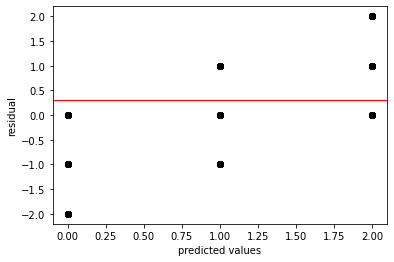

In [100]:
# Visualizing the residuals using a scatter plot 


plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('predicted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Residuals are centered around a mean of appx 0.43
…positive values for the residual (on the y-axis) mean the prediction was too low, and negative values mean the prediction was too high; 0 means the guess was exactly correct


## 10.2 Barlett's test

In [101]:
# Carrying out Barlett's test 
# It is a more thorough heteroskedasticity test.

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value


critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('The variances are Homogeneous!')

2.156757663300631e-97
The variances are Homogeneous!
